In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader
from dataset import PetSegmentationDataset  # Import our dataset class

# Configuration class
class Config:
    # Data configs
    DATA_ROOT = './Dataset'  # Adjust this to your dataset path
    IMG_SIZE = (256, 256)
    BATCH_SIZE = 16
    NUM_WORKERS = 4
    
    # Training configs
    DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    LEARNING_RATE = 1e-4
    NUM_EPOCHS = 100
    
    # Model configs
    NUM_CLASSES = 3  # background, cat, dog

# Set random seeds for reproducibility
def set_seed(seed: int = 42):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    
set_seed()

# Utility function for visualization
def visualize_sample(image, mask, pred_mask=None, point=None):
    plt.figure(figsize=(10, 5))
    
    # Plot image
    plt.subplot(1, 2 if pred_mask is None else 3, 1)
    plt.imshow(image.permute(1, 2, 0))
    plt.title('Image')
    if point is not None:
        plt.plot(point[1], point[0], 'r*', markersize=10)
    
    # Plot ground truth mask
    plt.subplot(1, 2 if pred_mask is None else 3, 2)
    plt.imshow(mask, cmap='tab10', vmin=0, vmax=2)
    plt.title('Ground Truth Mask')
    
    if pred_mask is not None:
        plt.subplot(1, 3, 3)
        plt.imshow(pred_mask, cmap='tab10', vmin=0, vmax=2)
        plt.title('Predicted Mask')
    
    plt.tight_layout()
    plt.show()

/opt/anaconda3/envs/torch/lib/python3.11/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/opt/anaconda3/envs/torch/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <EB3FF92A-5EB1-3EE8-AF8B-5923C1265422> /opt/anaconda3/envs/torch/lib/python3.11/site-packages/torchvision/image.so
  Reason: tried: '/opt/anaconda3/envs/torch/lib/python3.11/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/opt/anaconda3/envs/torch/lib/python3.11/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/opt/anaconda3/envs/torch/lib/python3.11/lib-dynload/../../libjpeg.9.dylib' (no such file), '/opt/anaconda3/envs/torch/bin/../lib/libjpeg.9.dylib' (no such file)'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `lib

Single sample test:
Image shape: torch.Size([3, 256, 256])
Mask shape: torch.Size([256, 256])
Unique mask values: tensor([0, 1, 2], dtype=torch.uint8)


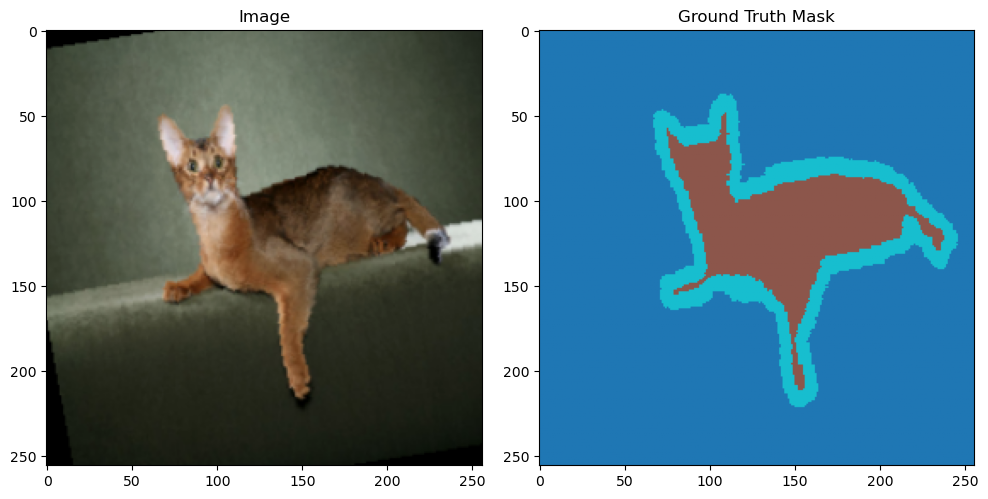

In [2]:
# Create dataset instance
train_dataset = PetSegmentationDataset(
    Config.DATA_ROOT,
    split='train',
    img_size=Config.IMG_SIZE,
    augment=True
)

# Test a single sample
sample = train_dataset[0]
print("Single sample test:")
print(f"Image shape: {sample['image'].shape}")
print(f"Mask shape: {sample['mask'].shape}")
print(f"Unique mask values: {torch.unique(sample['mask'])}")

# Visualize the sample
visualize_sample(sample['image'], sample['mask'])

/opt/anaconda3/envs/torch/lib/python3.11/site-packages/torchvision/io/image.py:14: UserWarning: Failed to load image Python extension: 'dlopen(/opt/anaconda3/envs/torch/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Library not loaded: @rpath/libjpeg.9.dylib
  Referenced from: <EB3FF92A-5EB1-3EE8-AF8B-5923C1265422> /opt/anaconda3/envs/torch/lib/python3.11/site-packages/torchvision/image.so
  Reason: tried: '/opt/anaconda3/envs/torch/lib/python3.11/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/opt/anaconda3/envs/torch/lib/python3.11/site-packages/torchvision/../../../libjpeg.9.dylib' (no such file), '/opt/anaconda3/envs/torch/lib/python3.11/lib-dynload/../../libjpeg.9.dylib' (no such file), '/opt/anaconda3/envs/torch/bin/../lib/libjpeg.9.dylib' (no such file)'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `lib


Batch test:
Batch image shape: torch.Size([16, 3, 256, 256])
Batch mask shape: torch.Size([16, 256, 256])


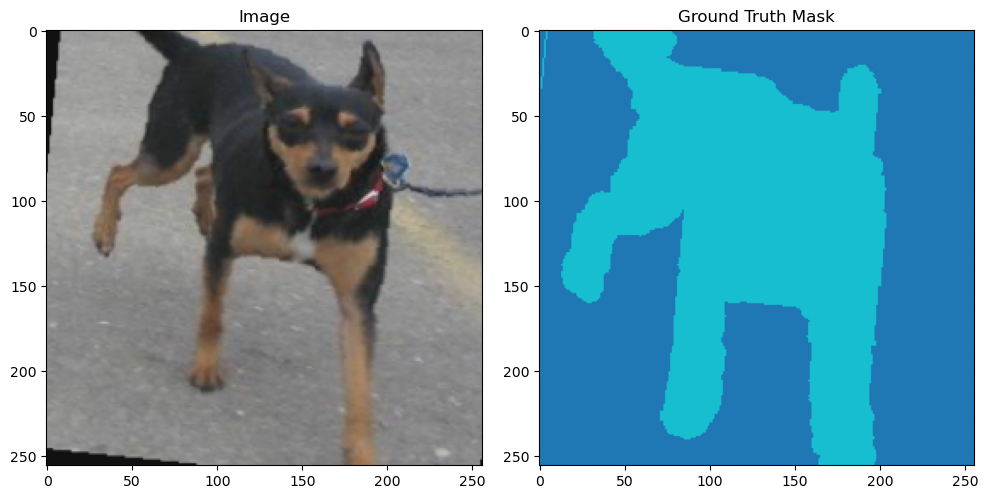

In [3]:
# Create dataloader
train_loader = DataLoader(
    train_dataset,
    batch_size=Config.BATCH_SIZE,
    shuffle=True,
    num_workers=Config.NUM_WORKERS
)

# Test loading a batch
batch = next(iter(train_loader))
print("\nBatch test:")
print(f"Batch image shape: {batch['image'].shape}")
print(f"Batch mask shape: {batch['mask'].shape}")

# Visualize first image in batch
visualize_sample(batch['image'][0], batch['mask'][0])